In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/mohitmotwani/Desktop/Extra-curriculars/UBC Jobs/upswing/ef2018d.csv")

In [3]:
df.head(10)

,UNITID,XGRCOHRT,GRCOHRT,XUGENTER,UGENTERN,XPGRCOHR,PGRCOHRT,XRRFTCT,RRFTCT,XRRFTEX,...,XRRPTCTA,RRPTCTA,XRET_NMP,RET_NMP,XRET_PCP,RET_PCP,XSTUFACR,STUFACR,SFR,COUNS
0,100654,R,1402.0,R,1676.0,R,84.0,R,1288.0,R,...,R,6.0,R,6.0,R,100.0,R,20.0,20.0,NaN
1,100663,R,2245.0,R,3965.0,R,57.0,R,2207.0,R,...,R,71.0,R,33.0,R,46.0,R,19.0,19.0,NaN
2,100690,R,1.0,R,289.0,R,0.0,R,0.0,R,...,R,0.0,R,0.0,A,NaN,R,12.0,12.0,NaN
3,100706,R,1428.0,R,2392.0,R,60.0,R,1340.0,R,...,R,11.0,R,1.0,R,9.0,R,17.0,17.0,NaN
4,100724,R,1025.0,R,1185.0,R,86.0,R,951.0,R,...,R,16.0,R,2.0,R,13.0,R,15.0,15.0,NaN
5,100751,R,6632.0,R,8442.0,R,79.0,R,7385.0,R,...,R,22.0,R,14.0,R,64.0,R,22.0,22.0,NaN
6,100760,R,315.0,R,775.0,R,41.0,R,349.0,R,...,R,44.0,R,15.0,R,34.0,R,18.0,18.0,NaN
7,100812,A,NaN,A,NaN,A,NaN,A,NaN,A,...,A,NaN,A,NaN,A,NaN,R,15.0,15.0,NaN
8,100830,R,730.0,R,1330.0,R,55.0,R,627.0,R,...,R,25.0,R,15.0,R,60.0,R,17.0,17.0,NaN
9,100858,R,4744.0,R,6317.0,R,75.0,R,4771.0,R,...,R,59.0,R,44.0,R,75.0,R,19.0,19.0,NaN


In [4]:
rel_df = df[['UNITID','RRFTCTA', 'RET_NMF', 'SFR']]

In [5]:
rel_df = rel_df[rel_df.RRFTCTA > 500]
rel_df = rel_df.dropna()

In [6]:
rel_df['RETRATE'] = rel_df['RET_NMF'] / rel_df['RRFTCTA']
rel_df['RETRATE'] = rel_df['RETRATE'].round(2)
rel_df = rel_df[rel_df.RETRATE != 0]

Relationship Between Retention Rate and Student/Faculty Ratio


-0.4121712315764508

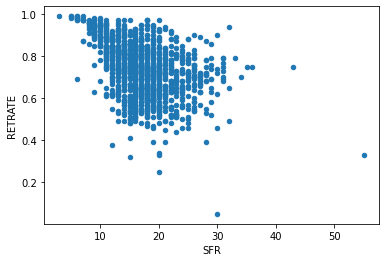

In [11]:
print("Relationship Between Retention Rate and Student/Faculty Ratio".center(40))
fig = rel_df.plot.scatter(x='SFR', y='RETRATE')
rel_df['SFR'].corr(rel_df['RETRATE'])

In [8]:
df2 = pd.read_csv("/Users/mohitmotwani/Desktop/Extra-curriculars/UBC Jobs/upswing/SuppStaff.csv")


In [9]:
college_IDs = []
for i in range(len(df2['UNITID'])-1):
    if df2['UNITID'][i] != df2['UNITID'][i+1]:
        college_IDs.append(df2['UNITID'][i+1])
        i = i + 1
college_IDs.insert(0, 100654)

In [10]:
for i in range(len(df2['OCCUPCAT'])):
    if df2['OCCUPCAT'][i] >= 210 and df2['OCCUPCAT'][i] < 220:
        df2['OCCUPCAT'][i] == 21

In [249]:
dict_count = {i: 0 for i in college_IDs}          

In [ ]:
#for loops designed to loop through spreadsheet and find number of support staff at each institute
for i in range(len(college_IDs)):
    for j in range(len(df2['UNITID'])):
        if df2['UNITID'][j] == college_IDs[i] and df2['OCCUPCAT'][j] == 21:
            dict_count[college_IDs[i]] += 1
